In [1]:

#General os library 
import os
import time
import sys
import numpy as np

import matplotlib.pyplot as plt
from qualang_tools.units import unit
from set_octave import get_L0_and_IF

from qm import SimulationConfig, LoopbackInterface
from qualang_tools.units import unit
from qualang_tools.loops import from_array
u = unit()
from qualang_tools.plot import interrupt_on_close
from qualang_tools.results import progress_counter, fetching_tool
from qualang_tools.addons.variables import assign_variables_to_element

#Path for HQCPC7 
sys.path.append(r'C:\Users\HQClabo\Documents\Code\QuantumMachine\Guillaume\NonLinearRes_calib_30_03_2023\Analysis_Function\NonLinearRes')
import AnFunc as an # analysis function


In [29]:
#Loading the data 

filepath=r"X:\Users\beaulieu\Data\Run01\131\2023_05_05\Spectrum\Amplitude_cut\single_0p6_amp_600ms.npz"

npzfile=np.load(filepath,allow_pickle=True)
#npzfile["multidata"][()]

amplitudes=npzfile["multidata"][()]["amplitudes"]
Data=npzfile["multidata"][()]["Data"]
Pump_freq=npzfile["multidata"][()]["Pump_freq"]
Analyzer_freq=npzfile["multidata"][()]["Analyzer_freq"]

In [30]:
integrate=an.average_trace_numpy_after(Data,amplitudes,Pump_freq,Analyzer_freq)


In [31]:
integrate.shape

(10, 50, 1)

In [32]:
integrate=np.zeros((len(amplitudes),len(Pump_freq)))


#for each amplitudes 
for j,ampli in enumerate(amplitudes):
    mean_Data_watt=(np.mean(Data[ampli],axis=2))

    for i in range(len(Pump_freq)):
        integrate[j,i]=np.trapz(mean_Data_watt[i,:], dx=4)     



Text(0, 0.5, 'Amplitudes')

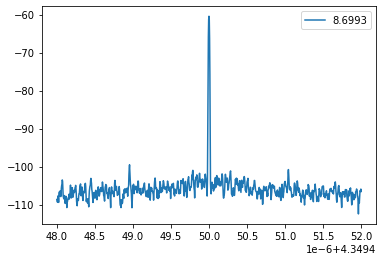

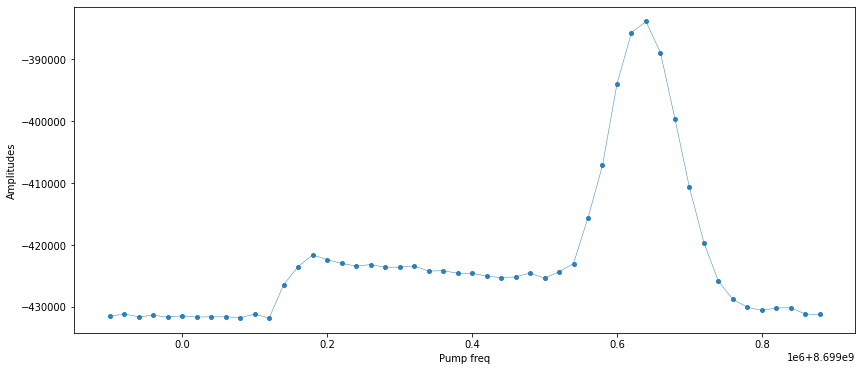

In [33]:
#Value of the normal integral without being in db 

i=20
plt.plot(Analyzer_freq[0,:]/1e9, np.mean(Data[ampli],axis=2)[i,:],label=Pump_freq[i]/1e9)
plt.legend()

fig, axs = plt.subplots( ncols=1, figsize=(14,6))
axs.plot(Pump_freq,(integrate[0,:]),'.-', alpha=.9, lw=.5, ms=8)
axs.plot([Pump_freq[i],Pump_freq[i]],[np.min(integrate[0,:]),np.min(integrate[0,:])])
axs.set_xlabel("Pump freq")
axs.set_ylabel("Amplitudes")



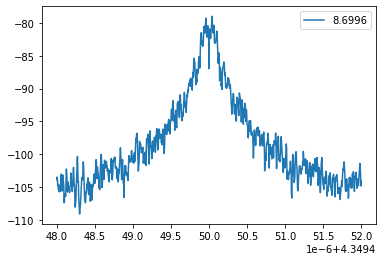

In [35]:
#plt single traces 

i=35
plt.plot(Analyzer_freq[0,:]/1e9, np.mean(Data[ampli],axis=2)[i,:],label=Pump_freq[i]/1e9)
plt.legend()

In [36]:
Data_del=np.delete(Data[ampli],500,1)
Data_del=np.delete(Data[ampli],500,1)
Data_del.shape

(50, 1000, 10)

In [37]:
#Removing central point 

integrate=np.zeros((len(amplitudes),len(Pump_freq)))


#for each amplitudes 
for j,ampli in enumerate(amplitudes):
    mean_Data_watt=10**(np.mean(Data_del,axis=2)/10)

    for i in range(len(Pump_freq)):
        integrate[j,i]=np.trapz(mean_Data_watt[i,:], dx=4)     



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


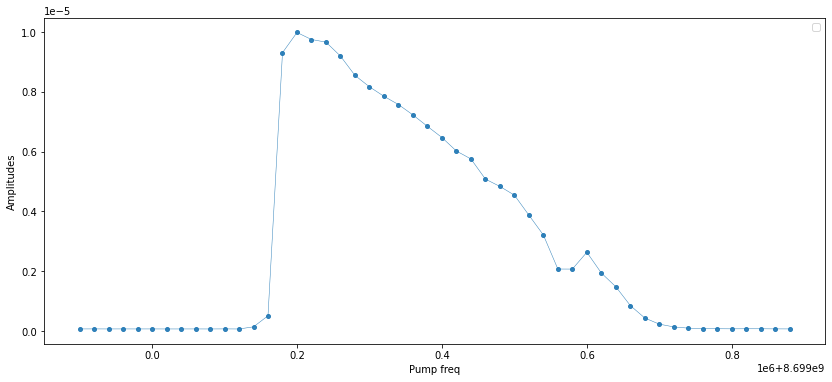

In [38]:
#Value of the normal integral without being in db 

fig, axs = plt.subplots( ncols=1, figsize=(14,6))
axs.plot(Pump_freq,(integrate[0,:]),'.-', alpha=.9, lw=.5, ms=8)
axs.set_xlabel("Pump freq")
axs.set_ylabel("Amplitudes")
axs.legend()


In [39]:
# Looking at the std 

integrate=np.zeros((Data[ampli].shape[2],len(Pump_freq)))


#for each amplitudes 
for j,ampli in enumerate(amplitudes):
    
    for k in range(Data[ampli].shape[2]):
        mean_Data_watt=10**(Data[ampli][:,:,k]/10)
    
        for i in range(len(Pump_freq)):
            integrate[k,i]=np.trapz(mean_Data_watt[i,:], dx=4)     


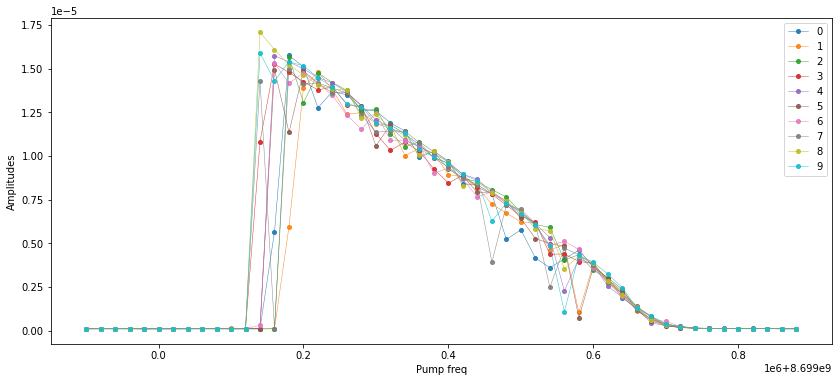

In [40]:
%matplotlib inline
#Value of the normal integral without being in db |
fig, axs = plt.subplots( ncols=1, figsize=(14,6))
for i in range(Data[ampli].shape[2]):

    axs.plot(Pump_freq,(integrate[i,:]),'.-', alpha=.9, lw=.5, ms=8,label=i)
    axs.set_xlabel("Pump freq")
    axs.set_ylabel("Amplitudes")
axs.legend()

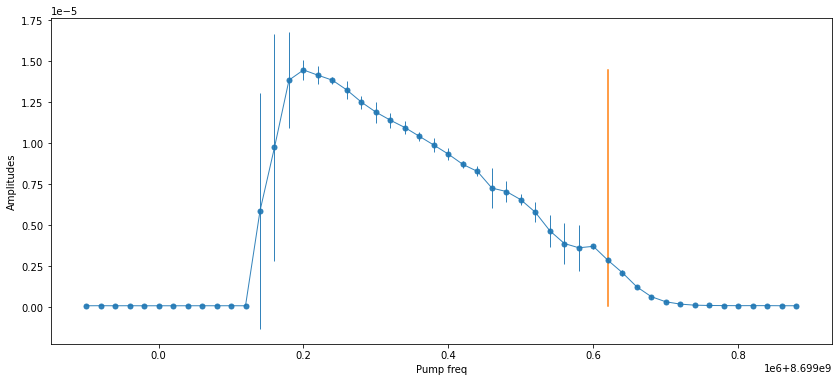

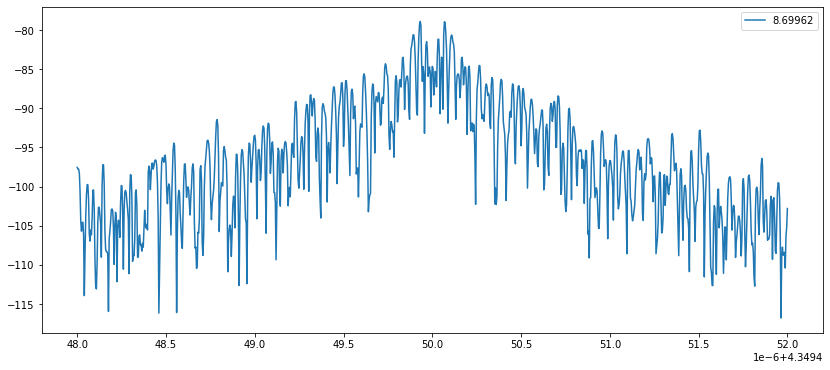

In [72]:
i=36#freuqency 
k=5# spectrum


fig, axs = plt.subplots( ncols=1, figsize=(14,6))
axs.errorbar(Pump_freq,np.mean(integrate,axis=0),np.std(integrate,axis=0), marker="o",alpha=.9, lw=1, ms=5)
axs.plot([Pump_freq[i],Pump_freq[i]],[min(np.mean(integrate,axis=0)), max(np.mean(integrate,axis=0))])
#axs.plot(Pump_freq,np.mean(integrate,axis=0),'.-', alpha=.9, lw=0.5, ms=8)
axs.set_xlabel("Pump freq")
axs.set_ylabel("Amplitudes")

fig, axs = plt.subplots( ncols=1, figsize=(14,6))
axs.plot(Analyzer_freq[0,:]/1e9, Data[ampli][i,:,k],label=Pump_freq[i]/1e9)
axs.legend()


## Multiple amplitudes 

In [78]:
#Loading the data 

filepath=r"X:\Users\beaulieu\Data\Run01\131\2023_05_05\Spectrum\Spectrum_av\Amplitude_cut\Multiple_amp_2000ms.npz"

npzfile=np.load(filepath,allow_pickle=True)
#npzfile["multidata"][()]

amplitudes=npzfile["multidata"][()]["amplitudes"]
Data=npzfile["multidata"][()]["Data"]
Pump_freq=npzfile["multidata"][()]["Pump_freq"]
Analyzer_freq=npzfile["multidata"][()]["Analyzer_freq"]

In [79]:
integrate=an.average_trace_numpy_after(Data,amplitudes,Pump_freq,Analyzer_freq)

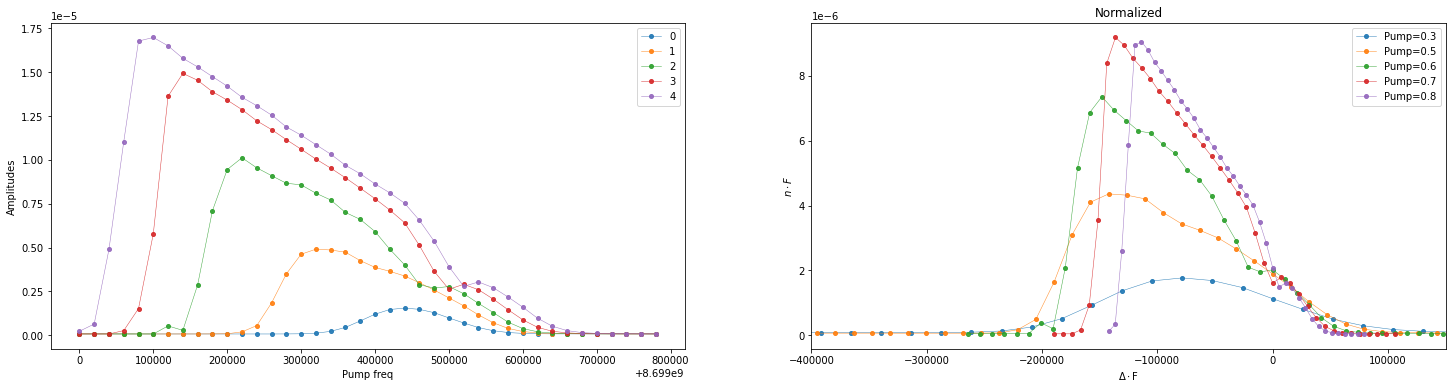

In [88]:
fig, axs = plt.subplots( ncols=2, figsize=(25,6))
ax=axs[0]

for i in range(len(amplitudes)):

    ax.plot(Pump_freq,np.mean(integrate[:,:,i],axis=0),'.-', alpha=.9, lw=.5, ms=8,label=i)
    ax.set_xlabel("Pump freq")
    ax.set_ylabel("Amplitudes")
ax.legend()


ax=axs[1]
Gi=0.4
center_freq=4.34975e9*2  


for i in range(len(amplitudes)):
    Gx=amplitudes[i]
    ax.plot((Pump_freq-center_freq)*(Gi/Gx)**2,np.mean(integrate[:,:,i],axis=0)*Gi/Gx, '.-',  label=f'Pump={amplitudes[i]:.1f}', alpha=.9, lw=.5, ms=8)

ax.set_title("Normalized")
ax.set_xlabel('$\Delta\cdot$F')
ax.set_ylabel('$n\cdot F$')
ax.set_xlim((-4e5,1.5e5))
ax.legend()